## Loan Prediction Model

### Introduction

The dataset involves data from a loan approval process where customers' demographic, financial, and employment details are recorded. The task is to predict whether a loan will be approved (Loan_Status)

### Objective

A financial institution wants to automate the loan approval process by developing a machine learning model that predicts whether a loan application will be approved. By analyzing past loan application data, the model will consider attributes like income, loan amount, education, employment, and credit history to classify applications as approved or rejected

## 2.1 Understanding the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Upload train data
tr_df = pd.read_csv('train.csv', index_col =0)
tr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Upload test data
te_df = pd.read_csv('test.csv', index_col =0)
te_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [5]:
# Check the numerical data
list(set(tr_df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [6]:
tr_df_numerical = tr_df.select_dtypes(include = ['float64', 'int64'])
tr_df_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001002,5849,0.0,NaN,360.0,1.0
LP001003,4583,1508.0,128.0,360.0,1.0
LP001005,3000,0.0,66.0,360.0,1.0
LP001006,2583,2358.0,120.0,360.0,1.0
LP001008,6000,0.0,141.0,360.0,1.0


In [7]:
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#missing values in decsending order
tr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Distribution of categorical variables
tr_df_categorical = tr_df.select_dtypes(include='object')


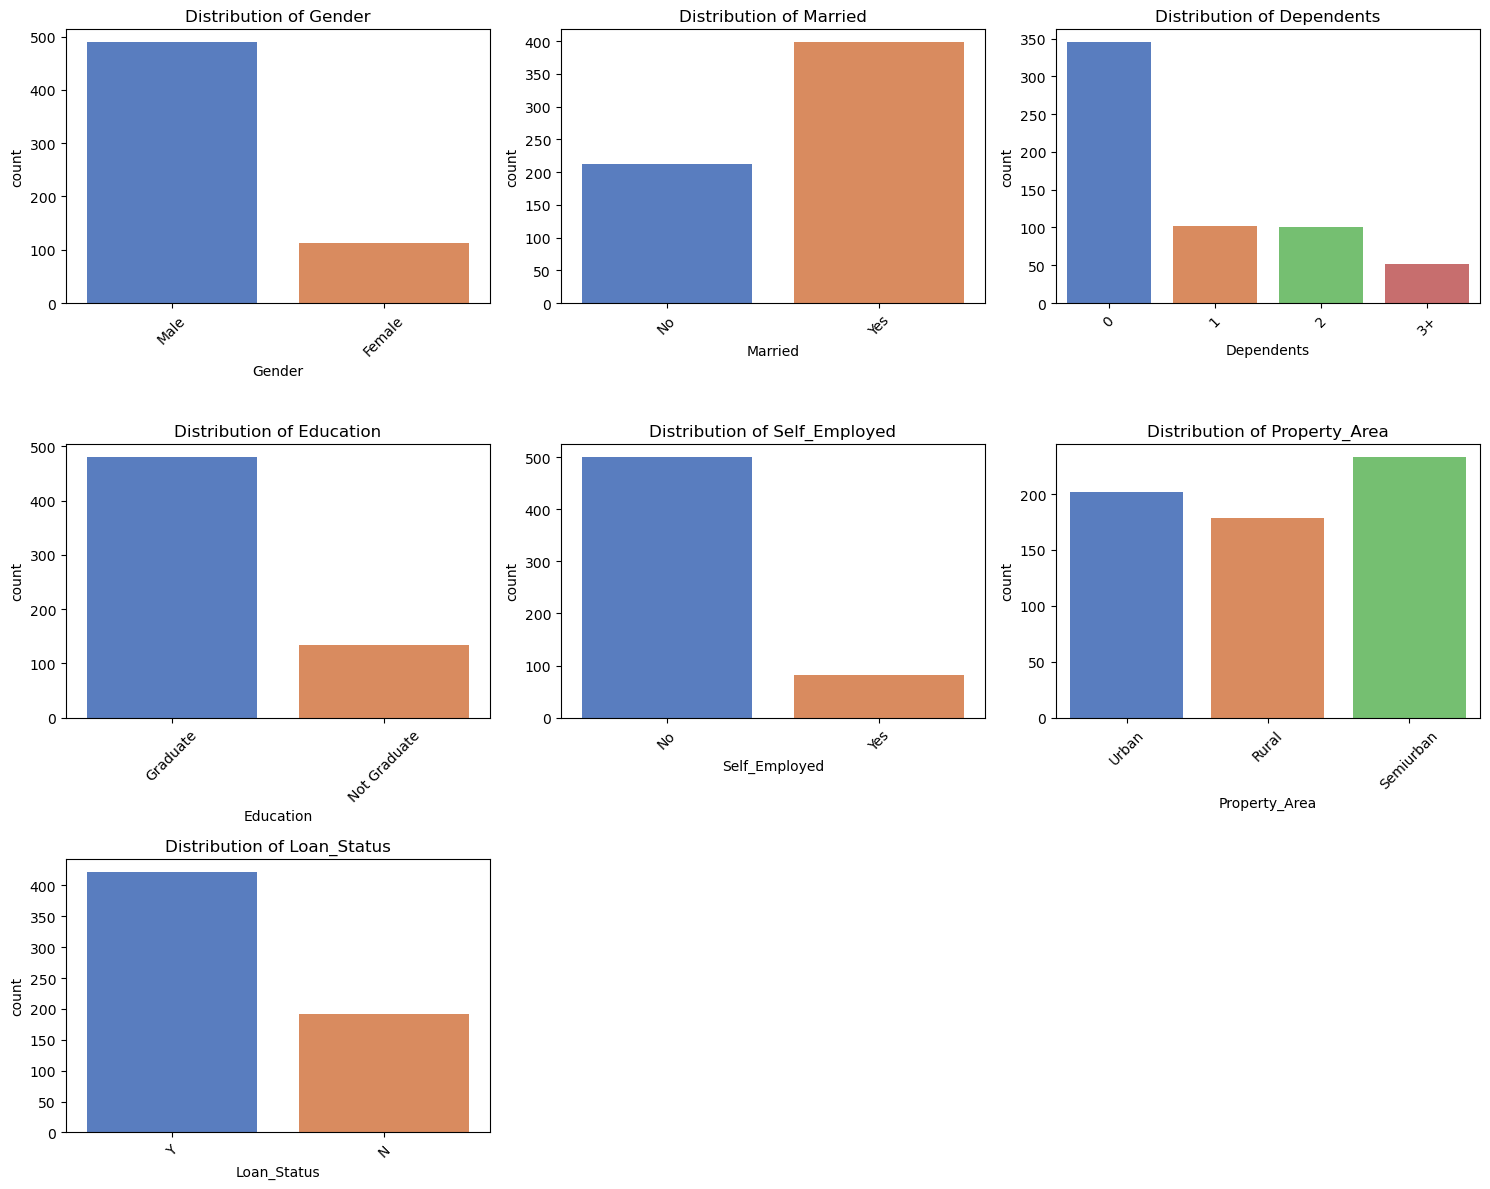

In [10]:
# Plot distribution of categorical variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(tr_df_categorical, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=tr_df, palette="muted")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

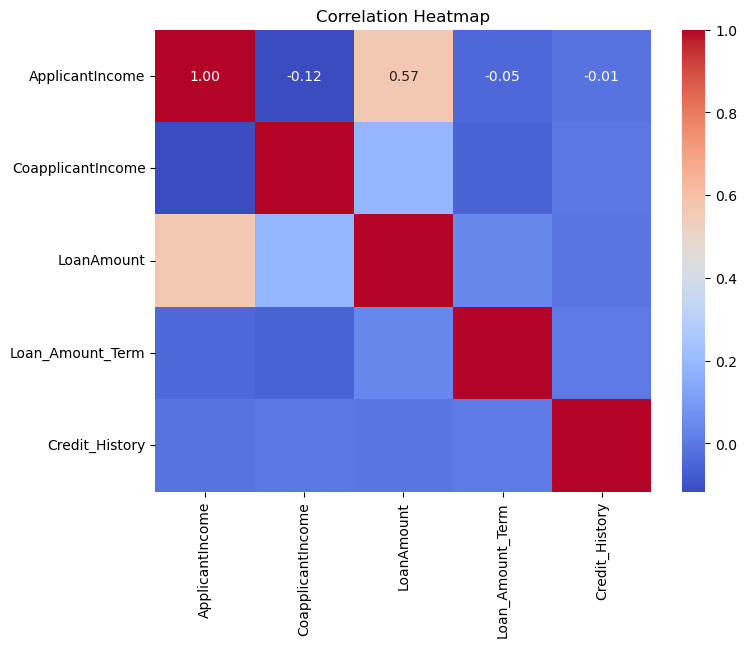

In [11]:
# Correlation Heatmap for numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(tr_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

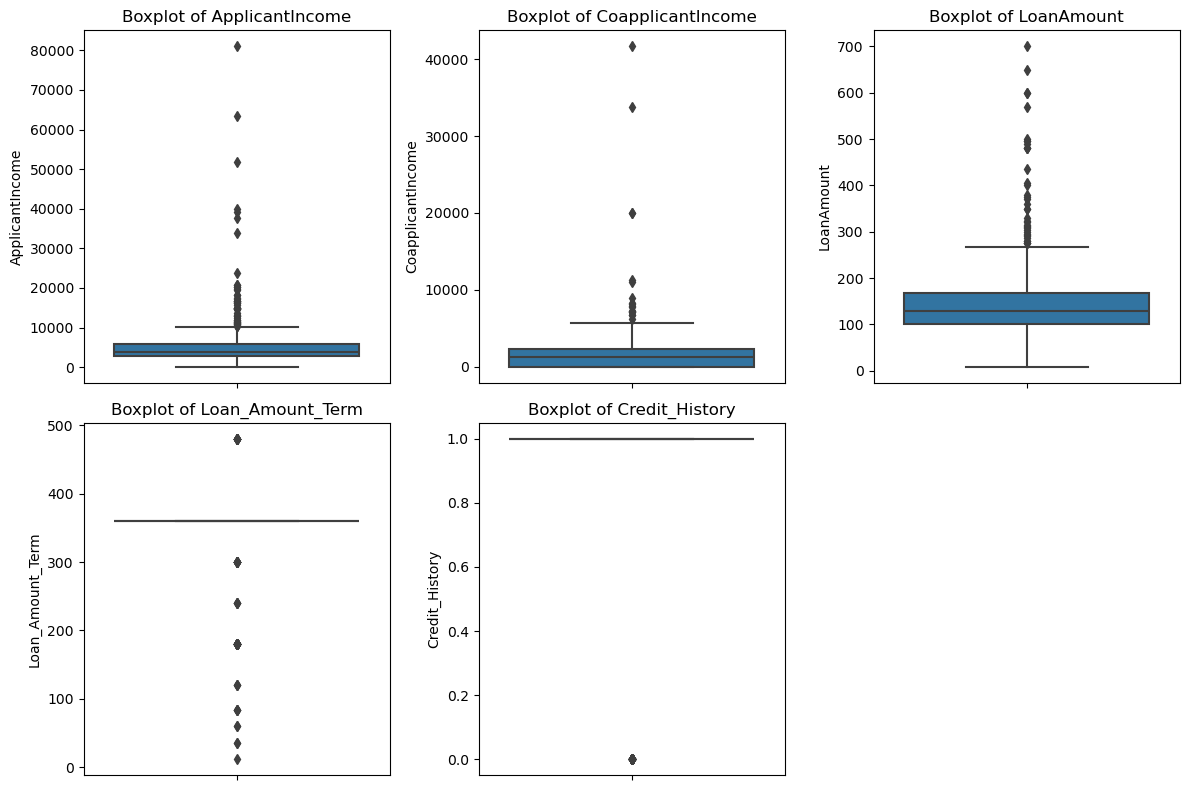

In [12]:
# Plot boxplots for all numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(tr_df_numerical, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=tr_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

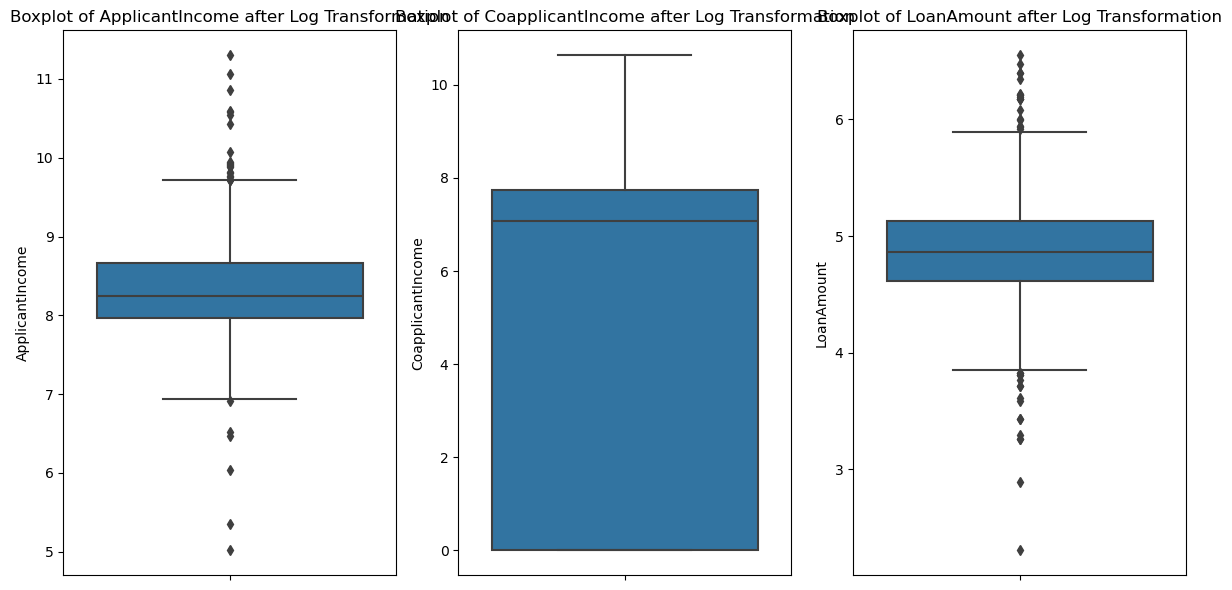

In [14]:
#Reduce skweness for the numerical columns using Log Transformation
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    tr_df[col] = np.log1p(tr_df[col])  # log1p handles zero values

# Verify the changes using a boxplot
plt.figure(figsize=(12, 6))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=tr_df[col])
    plt.title(f'Boxplot of {col} after Log Transformation')
plt.tight_layout()
plt.show()

In [16]:
tr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Handle categorical missing values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    tr_df[col].fillna(tr_df[col].mode()[0], inplace=True)

# Handle numerical missing values
tr_df['LoanAmount'].fillna(tr_df['LoanAmount'].median(), inplace=True)
tr_df['Loan_Amount_Term'].fillna(tr_df['Loan_Amount_Term'].median(), inplace=True)
tr_df['Credit_History'].fillna(tr_df['Credit_History'].mode()[0], inplace=True)

# Verify no missing values remain
print(tr_df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
